# Necessary Packages for Training Datasetes      

In [1]:
# Imports
import warnings
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam



# Assign Image size and Training Rate

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Define constants
IMAGE_SIZE = (128, 128)
INPUT_SHAPE = (128, 128, 3)
TRAINING_RATE = 0.001


# Load Training and Testing Datasets to generate Model

In [3]:
# Read the train and test datasets
train_datagen = ImageDataGenerator()
validate_datagen = ImageDataGenerator()

# Training dataset
training_set = train_datagen.flow_from_directory(
    'Datasets/train',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=20
)

# Validation dataset
validation_set = validate_datagen.flow_from_directory(
    'Datasets/val',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=20
)

# Mapping the class indices to their class labels
classes = {v: k for k, v in training_set.class_indices.items()}
classes


Found 11266 images belonging to 8 classes.
Found 2818 images belonging to 8 classes.


{0: 'Apple__Healthy',
 1: 'Apple__Rotten',
 2: 'Grape__Healthy',
 3: 'Grape__Rotten',
 4: 'Mango__Healthy',
 5: 'Mango__Rotten',
 6: 'Orange__Healthy',
 7: 'Orange__Rotten'}

# Initialize Training method and Training Rate

In [4]:

# Model
input_shape = INPUT_SHAPE
inputs = Input(input_shape)

# EfficientNetB0 model
efficient_net = EfficientNetB0(include_top=False, input_shape=input_shape, weights='imagenet')(inputs)

# Add custom layers using Sequential
custom_model = Sequential()

# Add GlobalAveragePooling2D directly after EfficientNetB0
custom_model.add(GlobalAveragePooling2D(input_shape=(4, 4, 1280)))  # Ensure this matches EfficientNetB0's output
custom_model.add(Dropout(0.5))
custom_model.add(Dense(len(classes), activation='softmax'))

# Connect EfficientNetB0 output with the custom layers
outputs = custom_model(efficient_net)

# Set Optimizer
opt1 = SGD(learning_rate=TRAINING_RATE)
opt2 = Adam(learning_rate=TRAINING_RATE)

# Create and compile the model
model = Model(inputs, outputs)
model.compile(optimizer=opt1,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


16705208/16705208 [==============================] - 8s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 4, 4, 1280)        4049571   
 )                                                               
                                                                 
 sequential (Sequential)     (None, 8)                 10248     
                                                                 
Total params: 4059819 (15.49 MB)
Trainable params: 4017796 (15.33 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


# To Start Training Process

In [5]:
# Training
Training_model = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=1,
    validation_data=validation_set,
    validation_steps=len(validation_set)
)


564/564 [==============================] - 931s 2s/step - loss: 1.7342 - accuracy: 0.3649 - val_loss: 1.1509 - val_accuracy: 0.7260


# Save Trainned Model

In [6]:
# Save only the model weights
#model.save_weights("Trained_Models/LastModel.h5")


# Visualize the Trainned model accuracy

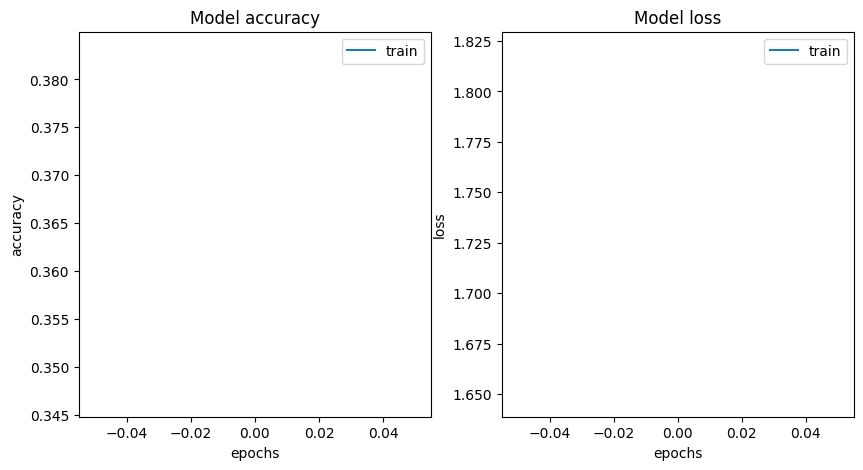

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax = ax.ravel()
for i, met in enumerate(['accuracy','loss']):
    ax[i].plot(Training_model.history[met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train'])
    
plt.show()


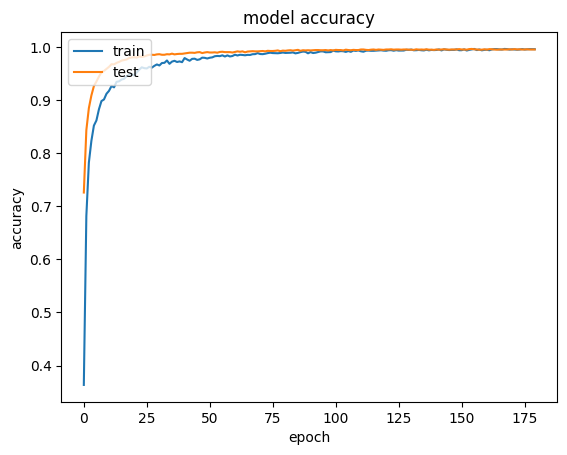

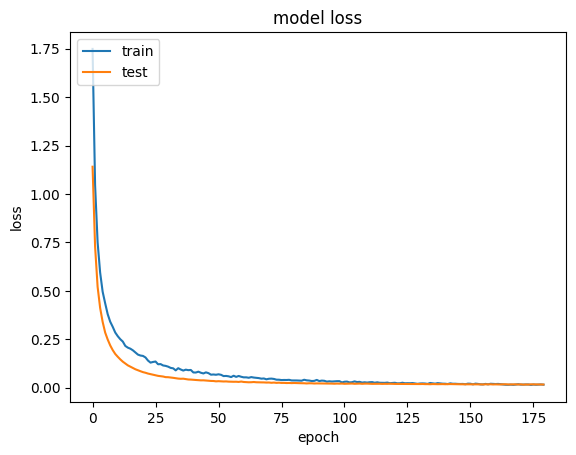

In [15]:
plt.plot(Training_model.history['accuracy'])
plt.plot(Training_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(Training_model.history['loss'])
plt.plot(Training_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
